## Data Warehouse - Lab Assignment 04
**Sales Data Warehouse**

------

*Connection*
Connect **SQL Server** with **Jupyter Notebook**

In [1]:
import pyodbc
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=DESKTOP-LF6ARI5;'
                      'Database=SalesWarehouse;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
print('Connected!')

Connected!


**Query 1:** Roll-up on total sales by year and by quarter

,totalsales,year,quarter
0,26,1998,1
1,88,1999,1
2,144,2000,1
3,161,2001,1
4,154,2002,1
5,216,2003,1
6,51,1998,2
7,109,1999,2
8,154,2000,2
9,161,2001,2


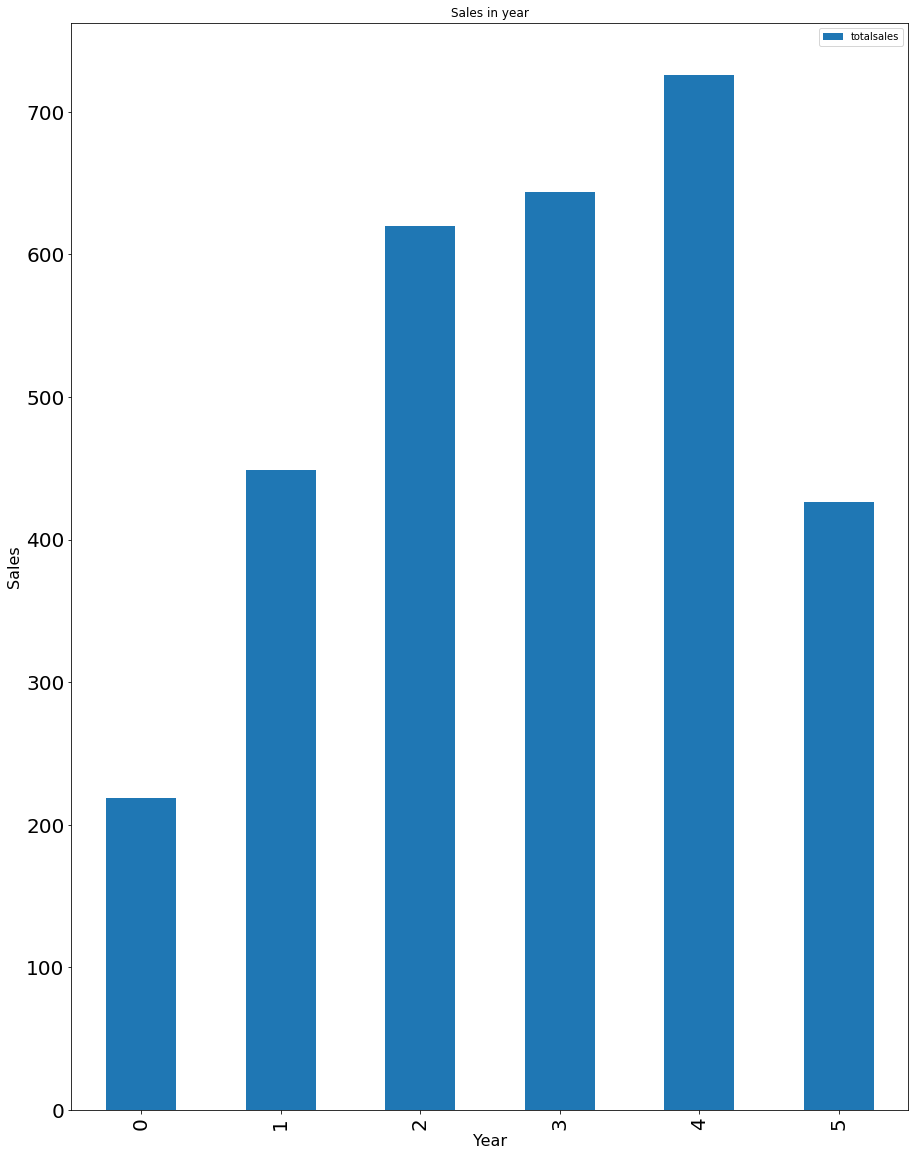

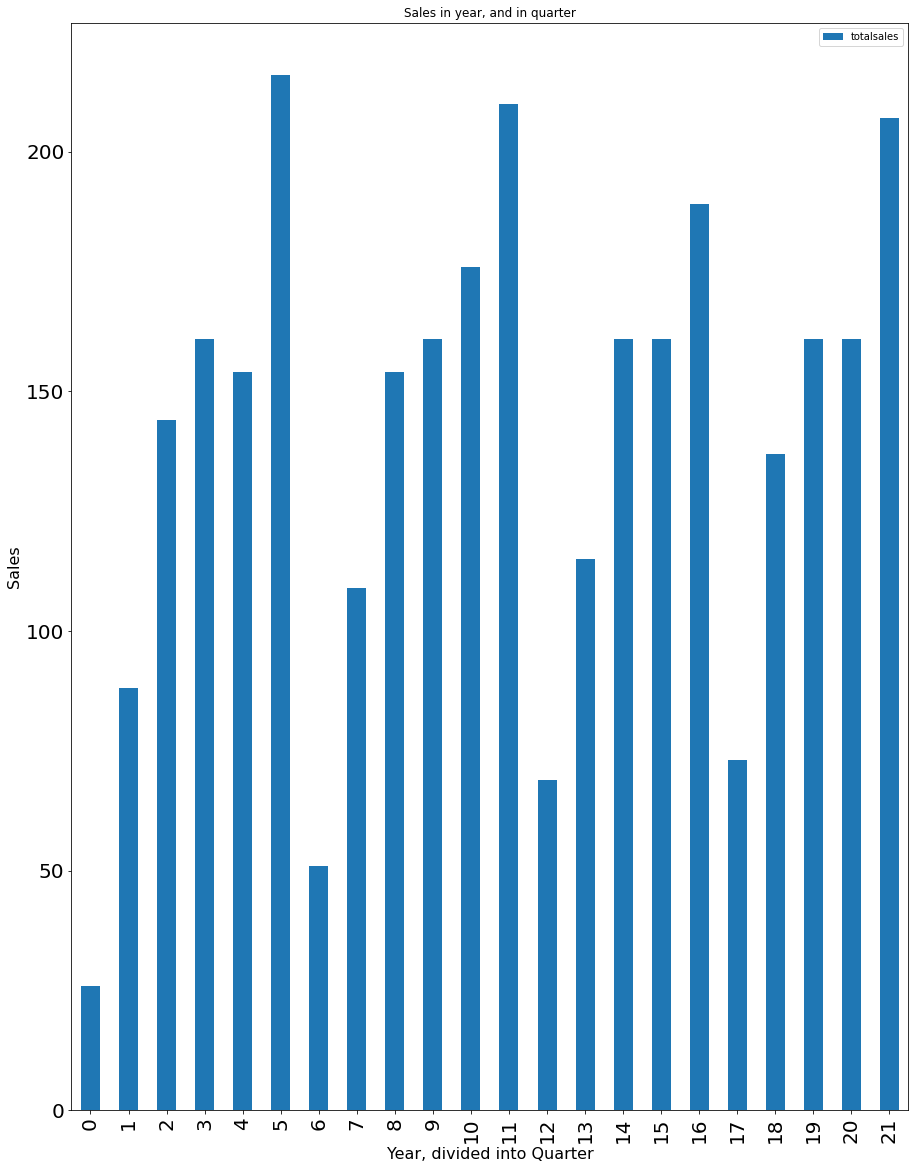

In [9]:
query1_rolledup = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.year \
                            FROM SalesFact F, TimeDimension D \
                            WHERE D.time_key = F.time_key \
                            GROUP BY D.year', \
                            conn)

query1 = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.year ,D.quarter \
                            FROM SalesFact F, TimeDimension D \
                            WHERE D.time_key = F.time_key \
                            GROUP BY D.year, D.quarter', \
                            conn)

**Query 1: Table**

In [ ]:
display(query1)

**Query 1: Graph-1**

In [ ]:
ax = query1_rolledup[['totalsales']].plot(kind='bar', title ="Sales in year", figsize=(15, 20), legend=True, fontsize=20)
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Sales", fontsize=16)
plt.show()

**Query 1: Graph-2**

In [ ]:
#drilled down
ax = query1[['totalsales']].plot(kind='bar', title ="Sales in year, and in quarter", figsize=(15, 20), legend=True, fontsize=20)
ax.set_xlabel("Year, divided into Quarter", fontsize=16)
ax.set_ylabel("Sales", fontsize=16)
plt.show()

**Query 2:** Roll-up on total sales by country, by city, and by street

,totalsales,country,city,street
0,58,United States,ABINGTON,1 Main Street
1,58,United States,ACCORD,2 Main Street
2,58,United States,ACTON,3 Main Street
3,58,United States,ACUSHNET,4 Main Street
4,58,United States,ADAMS,5 Main Street
5,58,United States,AGAWAM,6 Main Street
6,58,United States,ALLSTON,7 Main Street
7,58,United States,AMESBURY,8 Main Street
8,58,United States,AMHERST,10 Main Street
9,58,United States,AMHERST,11 Main Street


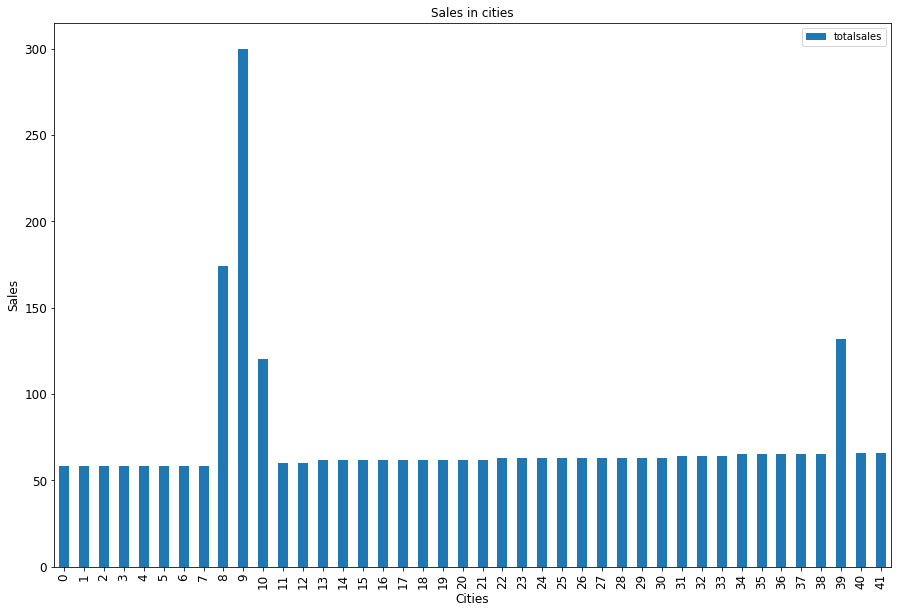

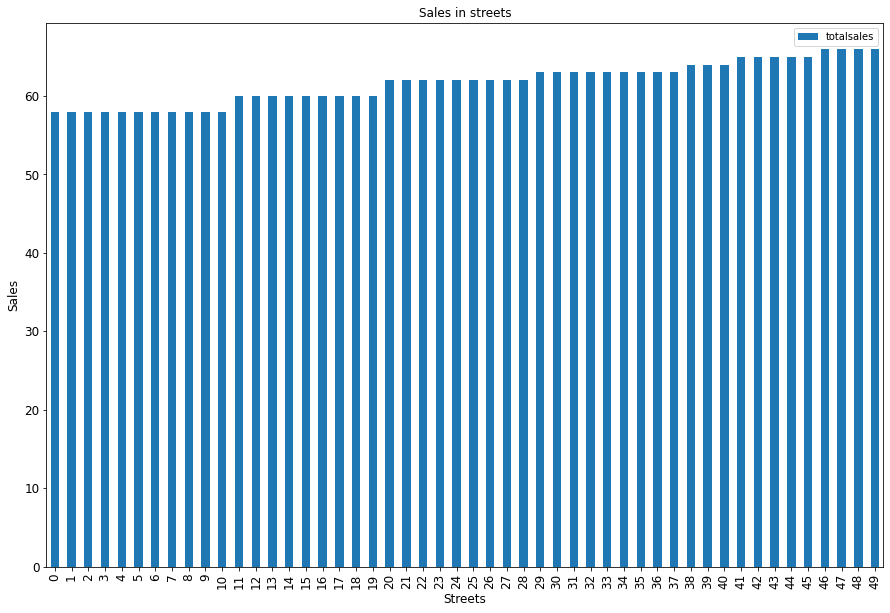

In [4]:
query2_rolledup = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.country, D.city \
                            FROM SalesFact F, LocationDimension D \
                            WHERE D.location_key = F.location_key \
                            GROUP BY D.country, D.city', \
                            conn)

query2 = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.country, D.city, D.street \
                            FROM SalesFact F, LocationDimension D \
                            WHERE D.location_key = F.location_key \
                            GROUP BY D.country, D.city, D.street', \
                            conn)

**Query 2: Table**

In [ ]:
display(query2)

**Query 2: Graph-1**

In [ ]:
ax = query2_rolledup[['totalsales']].plot(kind='bar', title ="Sales in cities", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Cities", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
plt.show()

**Query 2: Graph-2**

In [ ]:
ax = query2[['totalsales']].plot(kind='bar', title ="Sales in streets", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Streets", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
plt.show()

**Query 3:** Roll-up on total sales by item brand and by item type (digital or analog)

,totalsales,brand,type
0,12,Minolta,Analog
1,12,Minox,Analog
2,12,Mitsubishi,Analog
3,50,Mustek,Analog
4,13,NEC,Analog
5,260,Nikon,Analog
6,67,Olympus,Analog
7,160,Panasonic,Analog
8,30,Pentacon,Analog
9,105,Pentax,Analog


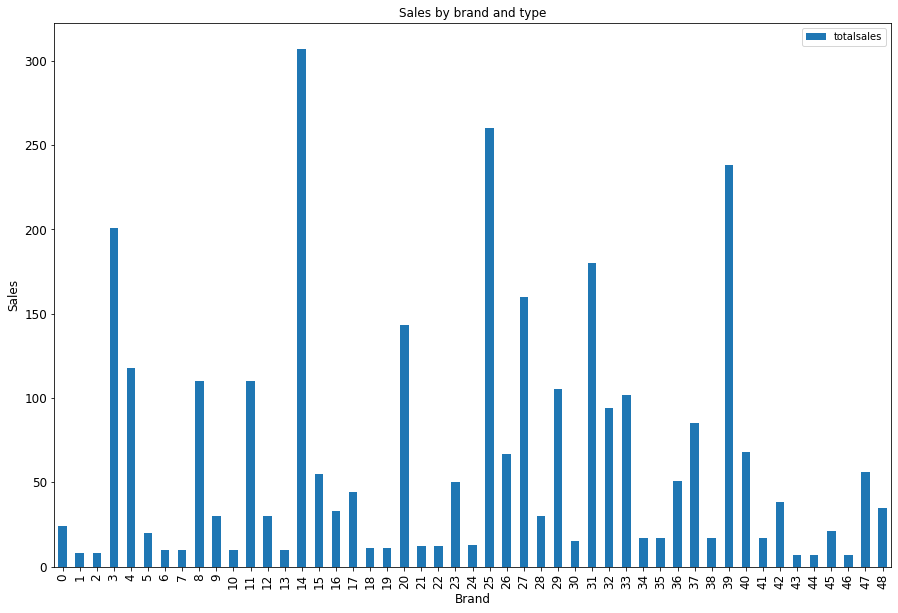

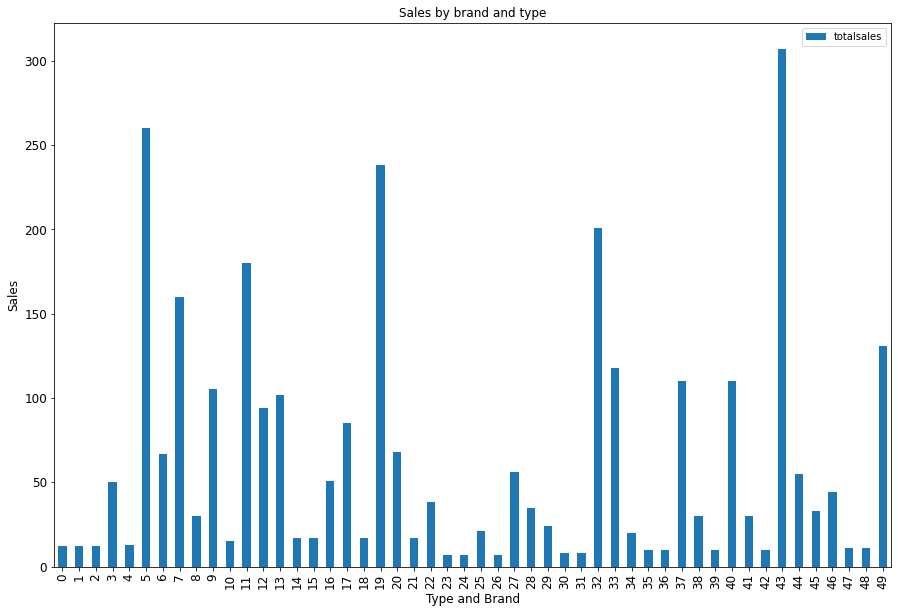

In [5]:
query3_brand = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.brand \
                            FROM SalesFact F, ItemDimension D \
                            WHERE D.item_key = F.item_key \
                            GROUP BY D.brand', \
                            conn)

query3 = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.brand, D.type \
                            FROM SalesFact F, ItemDimension D \
                            WHERE D.item_key = F.item_key \
                            GROUP BY D.brand, D.type', \
                            conn)

**Query 3: Table**

In [ ]:
display(query3)

**Query 3: Graph-1**

In [ ]:
ax = query3_brand[['totalsales']].plot(kind='bar', title ="Sales by brand and type", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Brand", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
plt.show()

**Query 3: Graph-2**

In [ ]:
ax = query3[['totalsales', 'type']].plot(kind='bar', title ="Sales by brand and type", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Type and Brand", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
plt.show()

**Query 4:** Drill down on total sales by month and by day

,totalsales,month,day_of_the_week
0,44,1,Friday
1,35,2,Friday
2,56,3,Friday
3,42,4,Friday
4,41,5,Friday
...,...,...,...
79,44,8,Wednesday
80,39,9,Wednesday
81,32,10,Wednesday
82,32,11,Wednesday


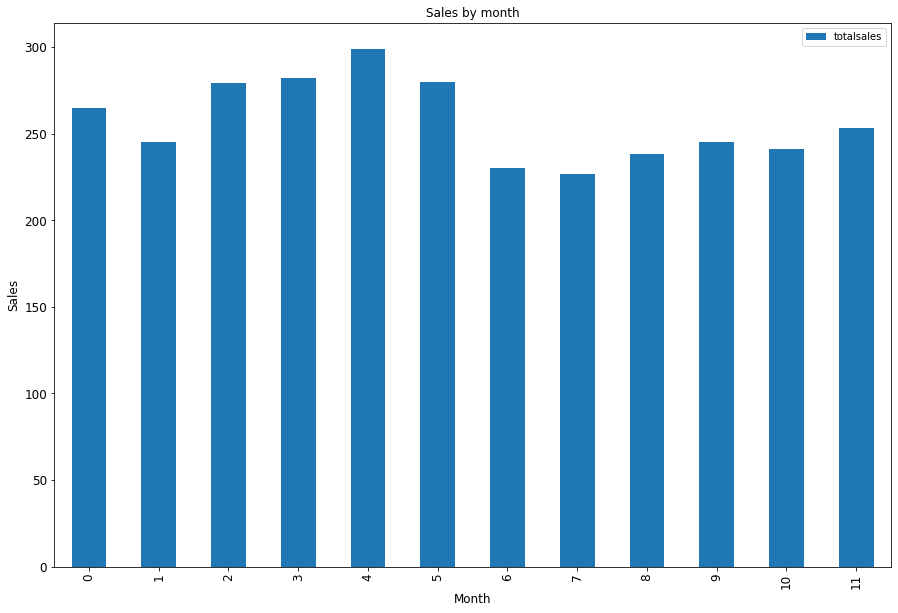

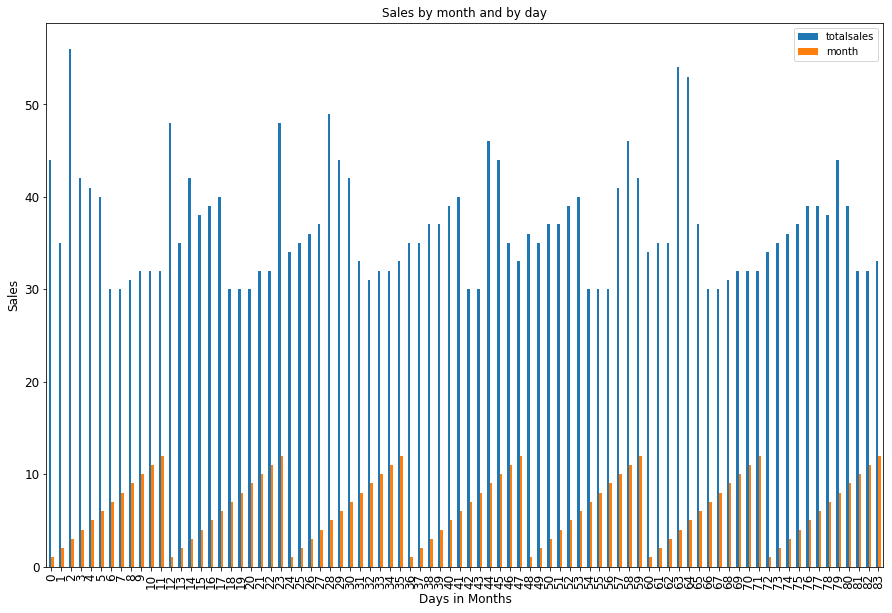

In [6]:
query4_rolledup = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.month \
                            FROM SalesFact F, TimeDimension D \
                            WHERE D.time_key = F.time_key \
                            GROUP BY D.month', \
                            conn)

query4 = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.month ,D.day_of_the_week \
                            FROM SalesFact F, TimeDimension D \
                            WHERE D.time_key = F.time_key \
                            GROUP BY D.month, D.day_of_the_week', \
                            conn)

**Query 4: Table**

In [ ]:
display(query4)

**Query 4: Graph-1**

In [ ]:
ax = query4_rolledup[['totalsales']].plot(kind='bar', title ="Sales by month", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
plt.show()

**Query 4: Graph-2**

In [ ]:
ax = query4[['totalsales', 'month']].plot(kind='bar', title ="Sales by month and by day", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Days in Months", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
plt.show()

**Query 5:** Drill down on total sales by item name

,totalsales,item_name
0,8,Agfa ePhoto CL20
1,8,Agfa ePhoto CL30
2,8,Agfa ePhoto CL34
3,8,AOL PhotoCam
4,8,Argus DC3500
...,...,...
254,7,Yashica Contax N Digital
255,7,Yashica Finecam 3300
256,7,Yashica KC-600
257,7,Yashica Samurai 1300DG


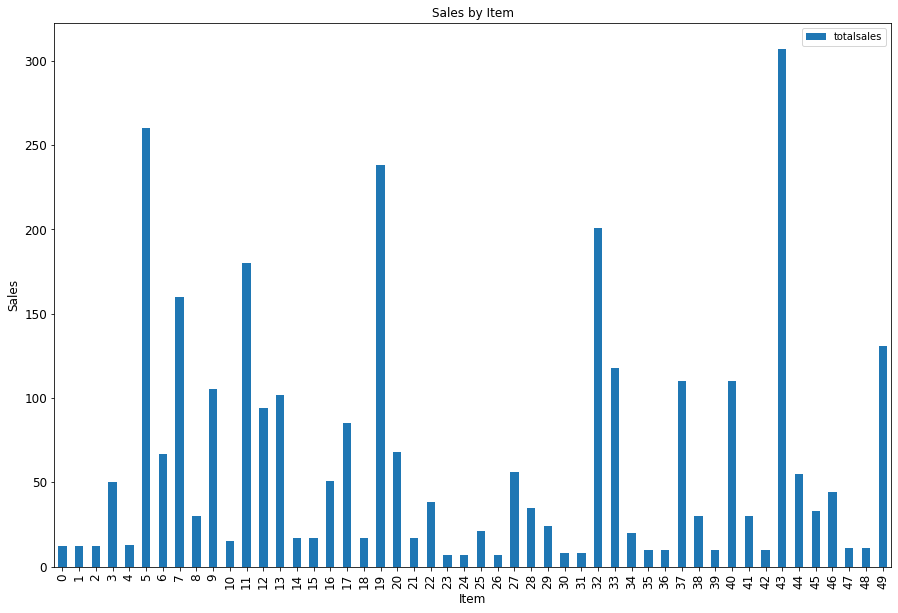

In [7]:
query5 = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.item_name \
                            FROM SalesFact F, ItemDimension D \
                            WHERE D.item_key = F.item_key \
                            GROUP BY D.item_name', \
                            conn)

**Query 5: Table**

In [ ]:
display(query5)

**Query 5: Graph**

In [ ]:
ax = query3[['totalsales']].plot(kind='bar', title ="Sales by Item", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Item", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
plt.show()

**Query 6:** Drill down on total sales by street address

,totalsales,street
0,58,1 Main Street
1,58,10 Main Street
2,58,11 Main Street
3,60,12 Main Street
4,60,13 Main Street
5,60,14 Main Street
6,60,15 Main Street
7,60,16 Main Street
8,60,17 Main Street
9,60,18 Main Street


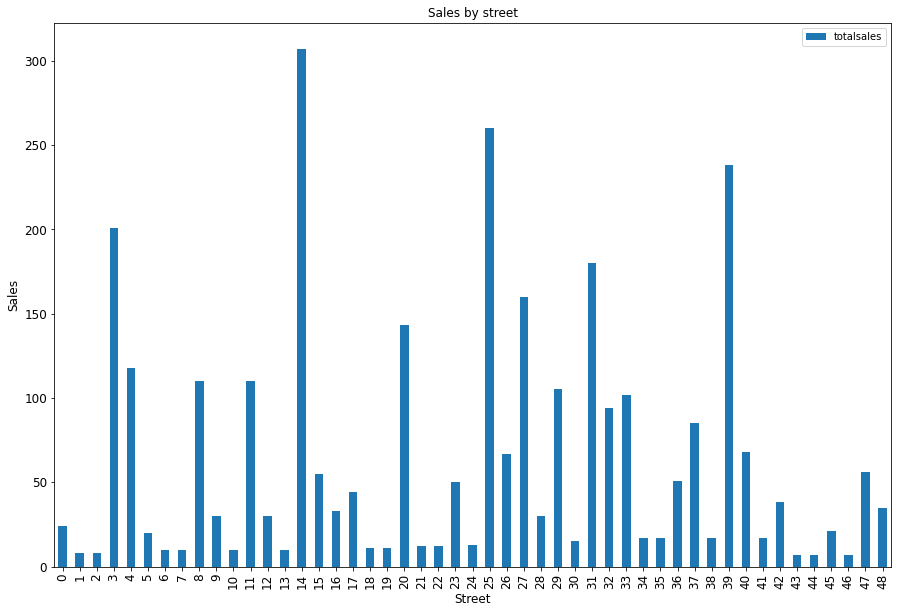

In [8]:
query6 = pd.read_sql_query('SELECT sum(F.dollars_sold) as totalsales, D.street \
                            FROM SalesFact F, LocationDimension D \
                            WHERE D.location_key = F.location_key \
                            GROUP BY D.street', \
                            conn)

**Query 6: Table**

In [ ]:
display(query6)

**Query 6: Graph**

In [ ]:
ax = query3_brand[['totalsales']].plot(kind='bar', title ="Sales by street", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Street", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
plt.show()